In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../evaluation_results.csv')

In [4]:
df.head()

,Query,Expected Answer,Generated Answer,Faithfulness Score,Answer Relevancy Score,Context Precision Score,Context Recall Score
0,Who are the parties to the Agreement and what ...,Cloud Investments Ltd. (“Company”) and Jack Ro...,The parties to the Agreement are not explicit...,0.0,0.000000,0.000000,1.000000
1,What is the termination notice?,According to section 4:14 days for convenience...,The termination notice is fourteen (14) days'...,1.0,0.933003,0.000000,0.500000
2,What are the payments to the Advisor under the...,According to section 6: 1. Fees of $9 per hour...,The payments to the Advisor under the Agreeme...,1.0,0.966477,0.250000,0.666667
3,Can the Agreement or any of its obligations be...,1. Under section 1.1 the Advisor can’t assign ...,"No, the Agreement or any of its obligations c...",1.0,0.959164,0.866667,1.000000
4,Who owns the IP?,According to section 4 of the Undertaking (App...,"The Company owns the Intellectual Property, e...",1.0,0.892765,0.000000,1.000000


In [5]:
df.describe()

,Faithfulness Score,Answer Relevancy Score,Context Precision Score,Context Recall Score
count,23.000000,23.000000,23.000000,23.000000
mean,0.699275,0.826988,0.234783,0.681159
std,0.384960,0.329715,0.334917,0.420927
min,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.900820,0.000000,0.375000
50%,1.000000,0.958566,0.000000,1.000000
75%,1.000000,0.976023,0.375000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [6]:
def compute_correlation(df):
    """
    This function computes the correlation matrix for the numerical columns in a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame for which to compute the correlation matrix.

    Returns:
    pandas.DataFrame: The correlation matrix of the numerical columns in the input DataFrame.
    """
    df_numeric = df.select_dtypes(include=[np.number])
    correlation_matrix = df_numeric.corr()
    return correlation_matrix

correlation_matrix = compute_correlation(df)
correlation_matrix

,Faithfulness Score,Answer Relevancy Score,Context Precision Score,Context Recall Score
Faithfulness Score,1.000000,0.545082,0.381549,0.351490
Answer Relevancy Score,0.545082,1.000000,0.307510,0.345081
Context Precision Score,0.381549,0.307510,1.000000,0.286447
Context Recall Score,0.351490,0.345081,0.286447,1.000000


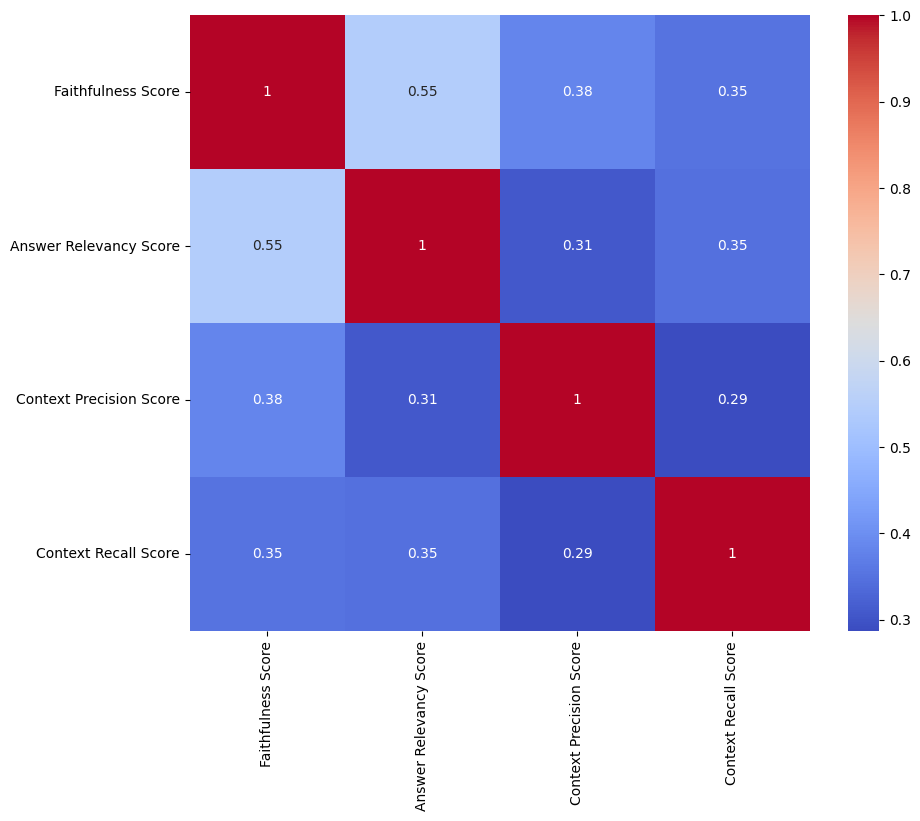

In [7]:
def plot_heatmap(correlation_matrix):
    """
    This function plots a heatmap for a given correlation matrix.

    Parameters:
    correlation_matrix (pandas.DataFrame): The correlation matrix to plot.

    """
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
    plt.show()

plot_heatmap(correlation_matrix)

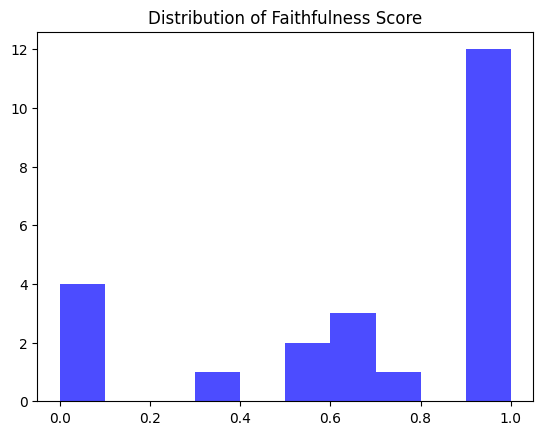

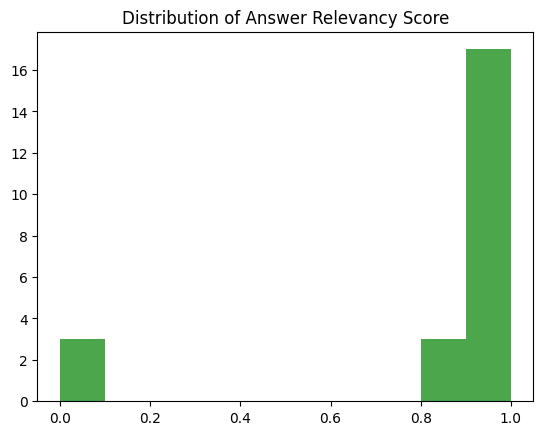

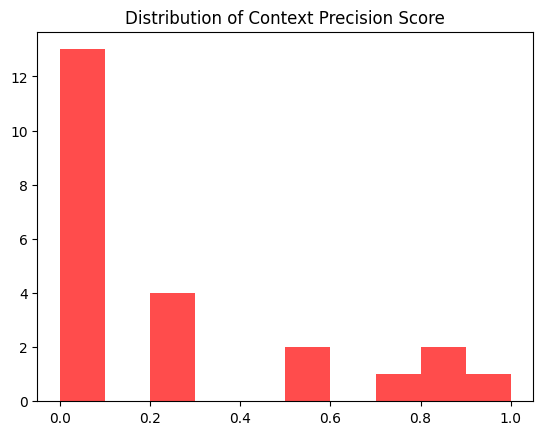

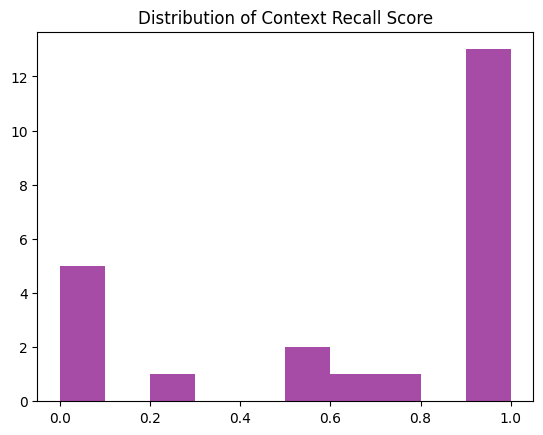

In [8]:
def plot_histograms(df):
    """
    This function plots histograms for the 'Faithfulness Score', 'Answer Relevancy Score',
    'Context Precision Score', and 'Context Recall Score' columns in a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the score columns.
    """
    import matplotlib.pyplot as plt

    df['Faithfulness Score'].hist(bins=10, grid=False, color='blue', alpha=0.7)
    plt.title('Distribution of Faithfulness Score')
    plt.show()

    df['Answer Relevancy Score'].hist(bins=10, grid=False, color='green', alpha=0.7)
    plt.title('Distribution of Answer Relevancy Score')
    plt.show()

    df['Context Precision Score'].hist(bins=10, grid=False, color='red', alpha=0.7)
    plt.title('Distribution of Context Precision Score')
    plt.show()

    df['Context Recall Score'].hist(bins=10, grid=False, color='purple', alpha=0.7)
    plt.title('Distribution of Context Recall Score')
    plt.show()

plot_histograms(df)

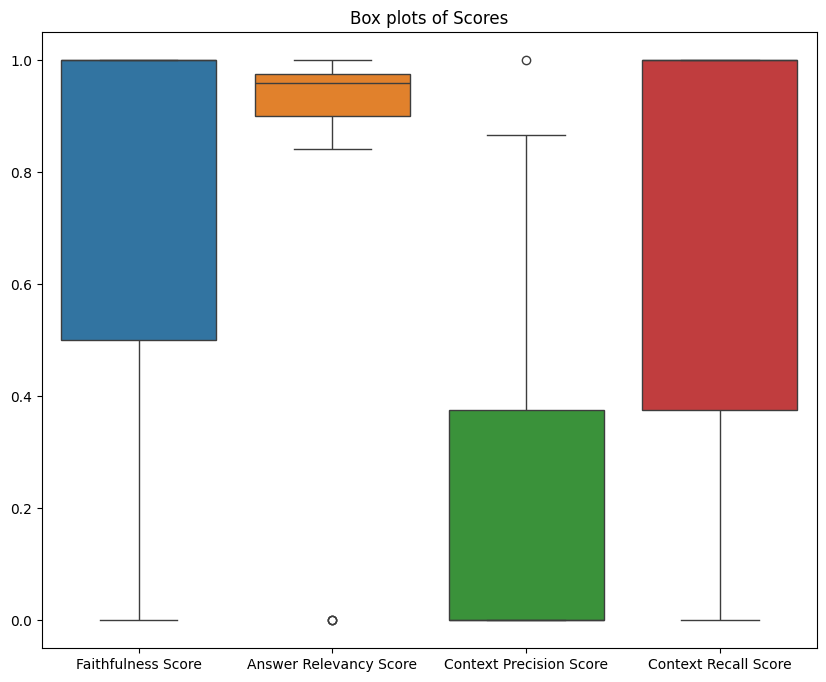

In [9]:
def plot_boxplots(df):
    """
    This function plots box plots for the 'Faithfulness Score', 'Answer Relevancy Score',
    'Context Precision Score', and 'Context Recall Score' columns in a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame containing the score columns.
    """
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 8))
    sns.boxplot(data=df[['Faithfulness Score', 'Answer Relevancy Score', 'Context Precision Score', 'Context Recall Score']])
    plt.title('Box plots of Scores')
    plt.show()

plot_boxplots(df)